<center> <h1>Module 4 - Multiple Linear Regression </h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

*Note: you will be duplicating a lot of code from Module 2 - it will save you time if you open up your Module 2 code and copy/paste as needed. Alternatively, you can skip the sections that have you copy/paste code from Module 2 to save time.*

**This is the same data set used in the Module 4 Course Notes. You can check your code output against the output from the course notes to verify you are getting the correct results.**

Companies are continually evaluating supervisors to not only determine adequate performance, but also gauge employee morale (an important indicator for employee productivity). In an effort to understand the important aspects of a good supervisor, 30 employees at a certain company were asked to provide an overall rating and scores on 6 characteristics of their immediate managers. Employees were asked to rate the following statements on a scale from 0 to 100 (0 meaning ”completely disagree” to 100 meaning ”completely agree”):

Variable   | Description
---------- | -------------
Rating     | Overall rating of supervisor performance. Higher score means better supervisor.
complaints | Score for "Your supervisor handles employee complaints appropriately."
Privileges | Score for "Your supervisor allows special privileges."
Learn      | Score for "Your supervisor provides opportunities to learn new things."
Raises     | Score for "Your supervisor bases raises on performance."
Critical   | Score for "Your supervisor is too critical of poor performance."
Advance    | Score for "I am *not* satisfied with the rate I am advancing in the company.”

Do the following:

1. Download the "Supervisor.txt" file from Canvas and put it in the same folder as this file.
2. Read in the data set, call it "super", and look at a summary of the data.  

In [2]:
student = pd.read_csv("../../02_project/data/StudentPerformanceFactors.csv")
student.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Explore the Data

### Create a Scatterplot Matrix

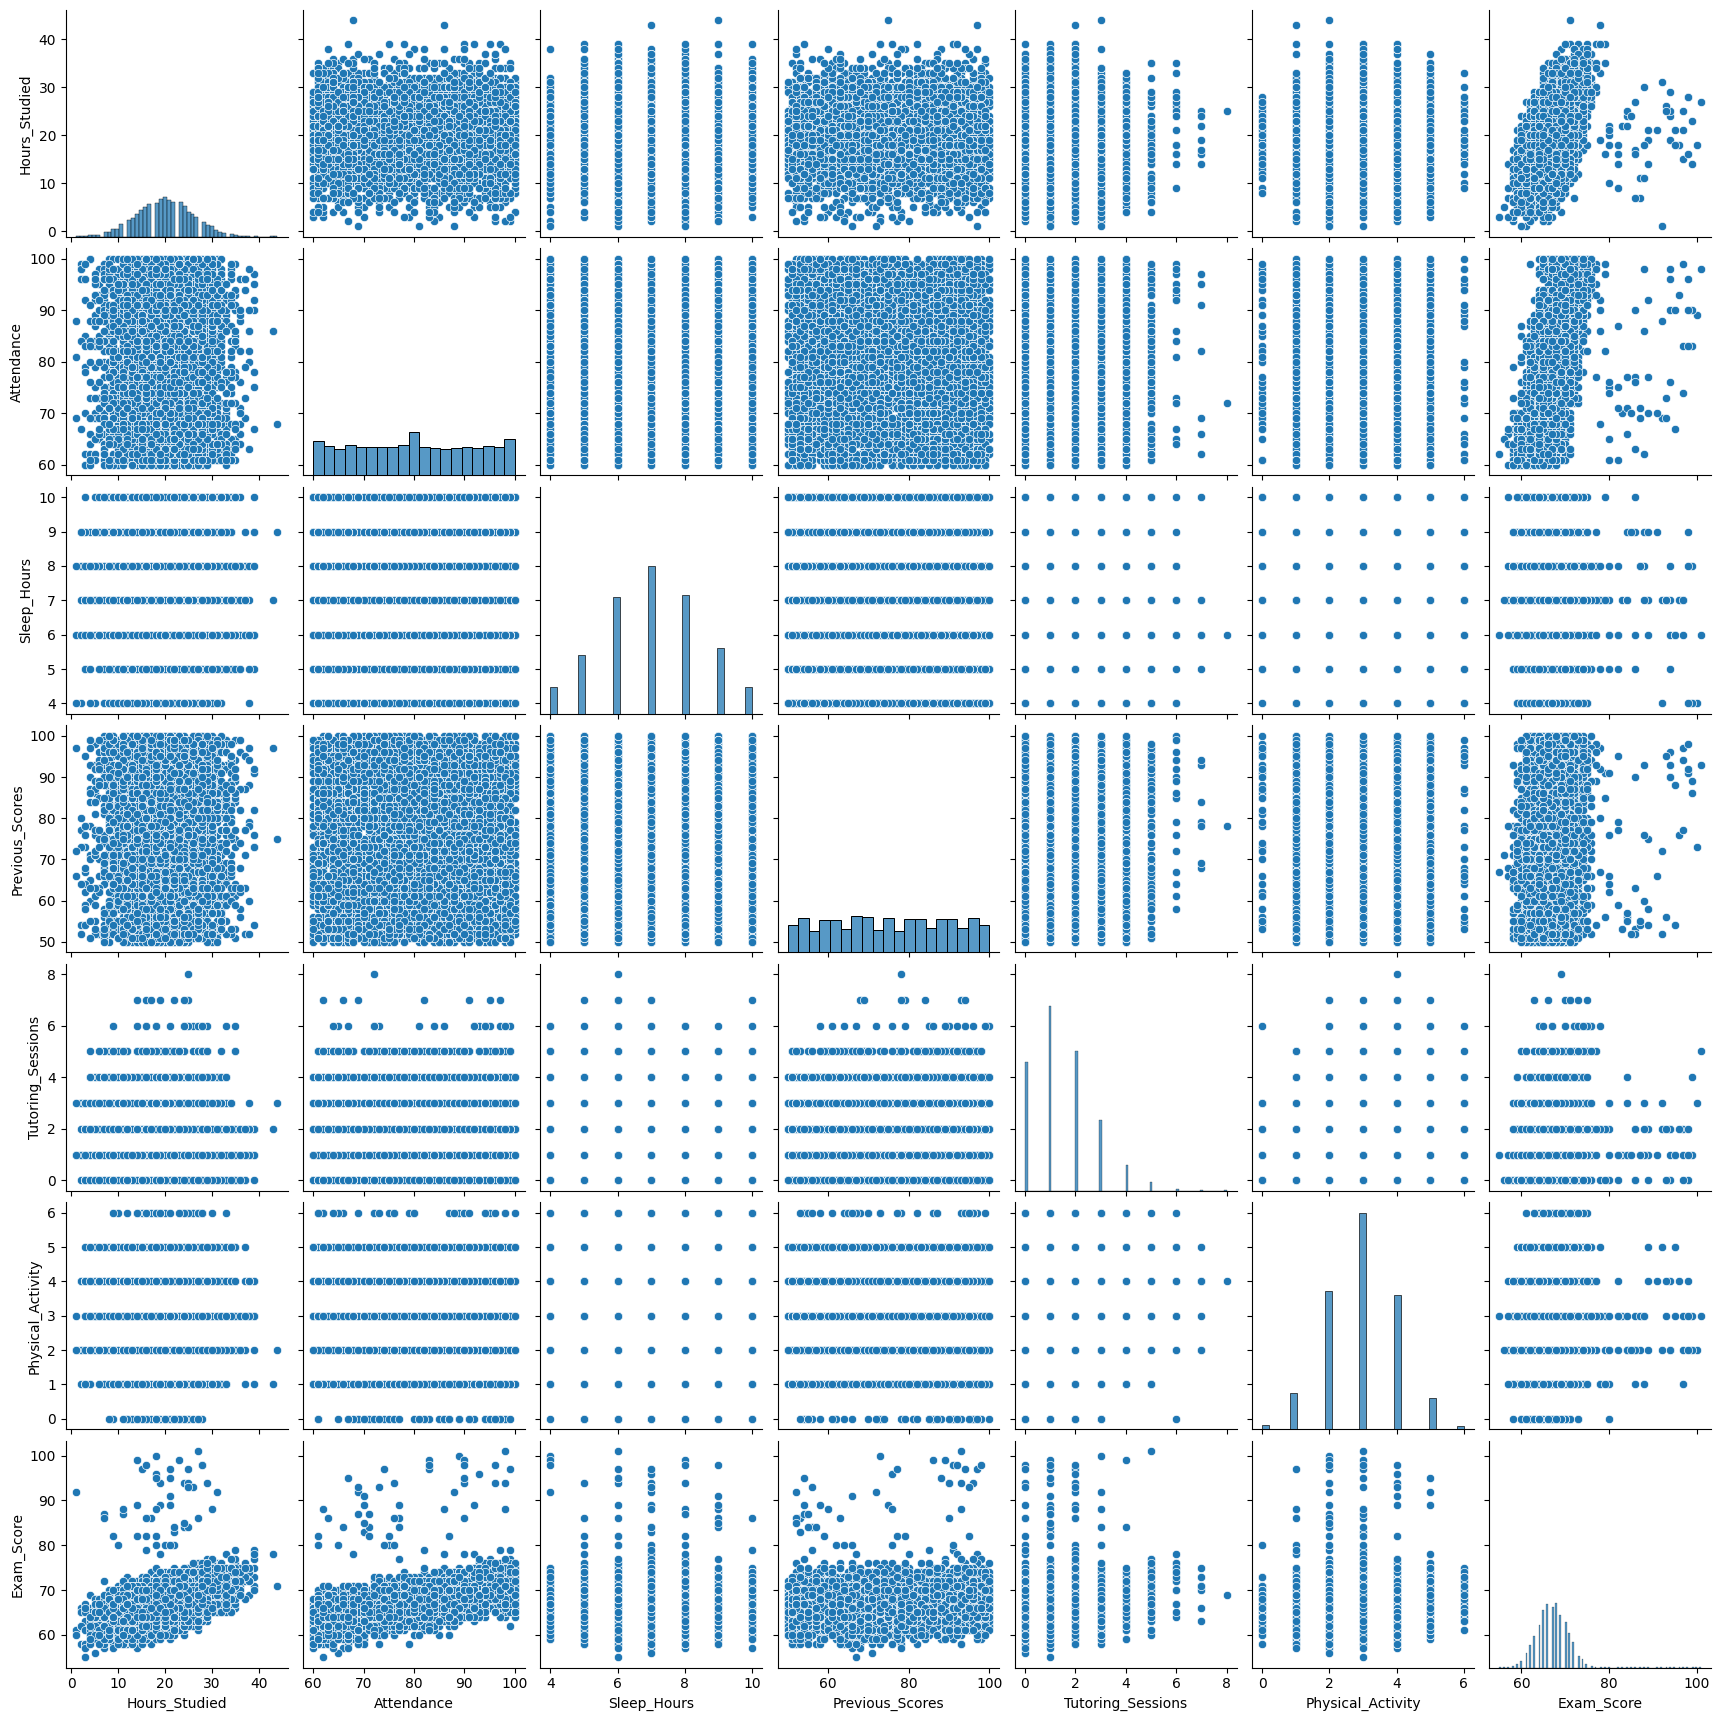

In [3]:
sns.pairplot(student)

### Create a Correlation Matrix

In [7]:
# Option 1: not color-coded
student.corr()

ValueError: could not convert string to float: 'Low'

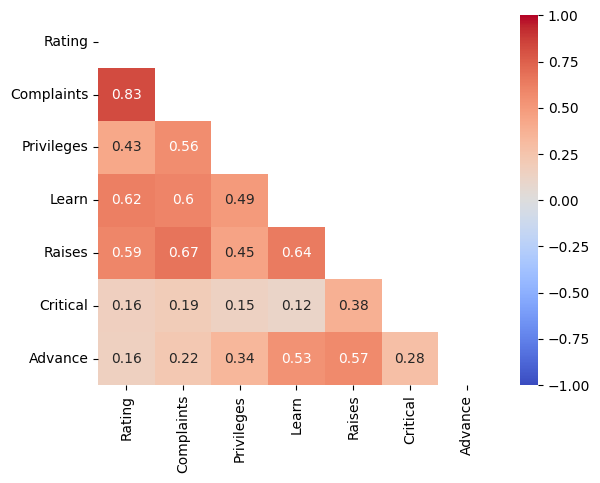

In [5]:
# Option 2: color-coded
sns.heatmap(super.corr(), 
            cmap = 'coolwarm',  # color pallete
            annot = True,  # adds the correlation values in the boxes
            vmin = -1,  # start color legend at -1
            vmax = 1,  # stop color legend at 1
            mask = np.triu(super.corr()))  # remove the upper half of the plot
plt.show()

## Fit a Multiple Linear Regression Model

In [6]:
y = super['Rating']
#X = sm.add_constant(super[['Complaints', 'Privileges', 'Learn', 'Raises', 'Critical', 'Advance']])
X = sm.add_constant(super.iloc[:, 1:7])  # this is equivalent to above
mod = sm.OLS(y, X)
res = mod.fit()

super['residuals'] = res.resid
super['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.24e-05
Time:                        12:07:36   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.362     -13.187      34.761
Complaints     0.6132      0.161      3.809      0.001       0.280       0.946
Privileges    -0.0731      0.136     -0.538      0.596      -0.354       0.208
Learn          0.3203      0.169      1.901      0.070      -0.028       0.669
Raises         0.0817      0.221      0.369      0.715      -0.376       0.540
Critical       0.0384      0.147      0.261      0.796      -0.266       0.342
Advance       -0.2171      0.178     -1.218      0.236      -0.586       0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
res.conf_int().index.tolist()

['const', 'Complaints', 'Privileges', 'Learn', 'Raises', 'Critical', 'Advance']

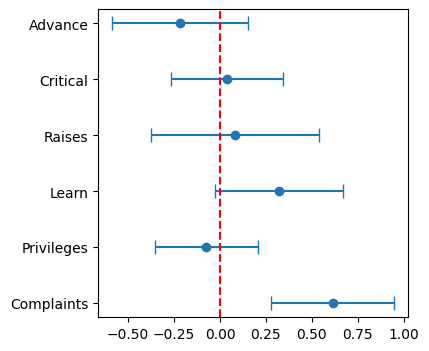

In [8]:
# Construct confidence interval data frame.
res_conf_int = {
    'term': res.conf_int().index.tolist(),
    'coef': res.params.tolist(),
    'conf_low': res.conf_int().loc[:, 0].tolist(),
    'conf_high': res.conf_int().loc[:, 1].tolist()
}

df = pd.DataFrame(res_conf_int)

# Selecting just slopes
df = df[df['term'] != 'const']

# Plotting the confidence interval
plt.figure(figsize=(4, 4))
# plt.errorbar(df['term'], df['coef'], 
#              yerr=[df['coef'] - df['conf_low'], df['conf_high'] - df['coef']], 
#              fmt='o', capsize=5, label='Estimates')
# plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.errorbar(df['coef'], df['term'],
             xerr=[df['coef'] - df['conf_low'], df['conf_high'] - df['coef']], 
             fmt='o', capsize=5, label='Estimates')
plt.axvline(0, color='red', linestyle='--', label='y=0')

## Check Certain Multiple Linear Regression Model Assumptions

### 1. The X's vs Y are linear

**(a) Scatterplot Matrix** (see above)

**(b) Residuals vs. Fitted Values Plot** (same code as in Module 2)

**(c) Residuals vs. Predictor Plots (6 plots in total)**

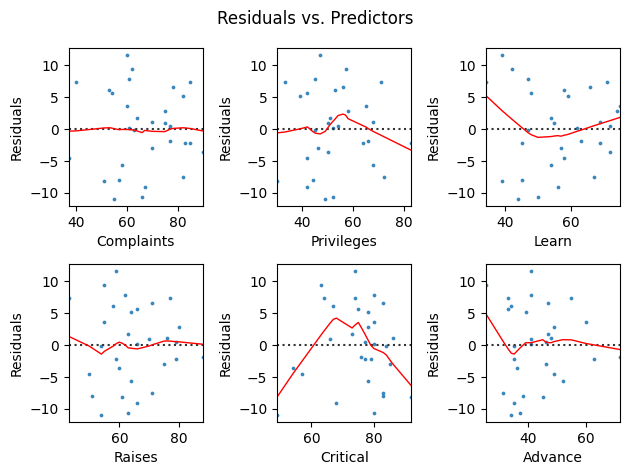

In [9]:
def res_vs_pred(variable, ax):
    sns.residplot(x = super[variable], 
                  y = super['residuals'],
                  lowess = True,
                  scatter_kws = {'s': 3},
                  line_kws = {'color': 'red', 'lw': 1},
                  ax = ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

fig, axes = plt.subplots(2, 3)
plt.suptitle("Residuals vs. Predictors")
res_vs_pred("Complaints", axes[0, 0])
res_vs_pred("Privileges", axes[0, 1])
res_vs_pred("Learn", axes[0, 2])
res_vs_pred("Raises", axes[1, 0])
res_vs_pred("Critical", axes[1, 1])
res_vs_pred("Advance", axes[1, 2])
fig.tight_layout()
plt.show()

**(d) Partial Regression Plots**

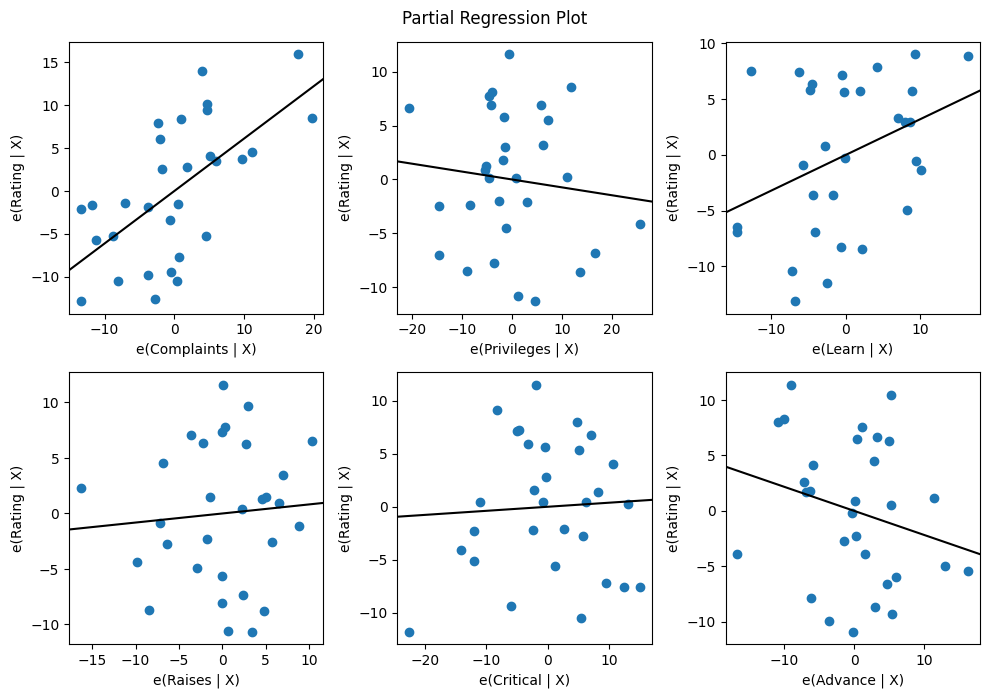

In [10]:
fig = plt.figure(figsize = (10,10))
sm.graphics.plot_partregress_grid(res, 
                                  exog_idx = list(super.columns[1:7]), 
                                  grid = (3, 3), 
                                  fig = fig)
fig.tight_layout()
plt.show()

### 5. The model describes all observations (i.e., there are no influential points)

**(a) DFFITS (same code as in Module 2)**

**(b) DFBETAS**

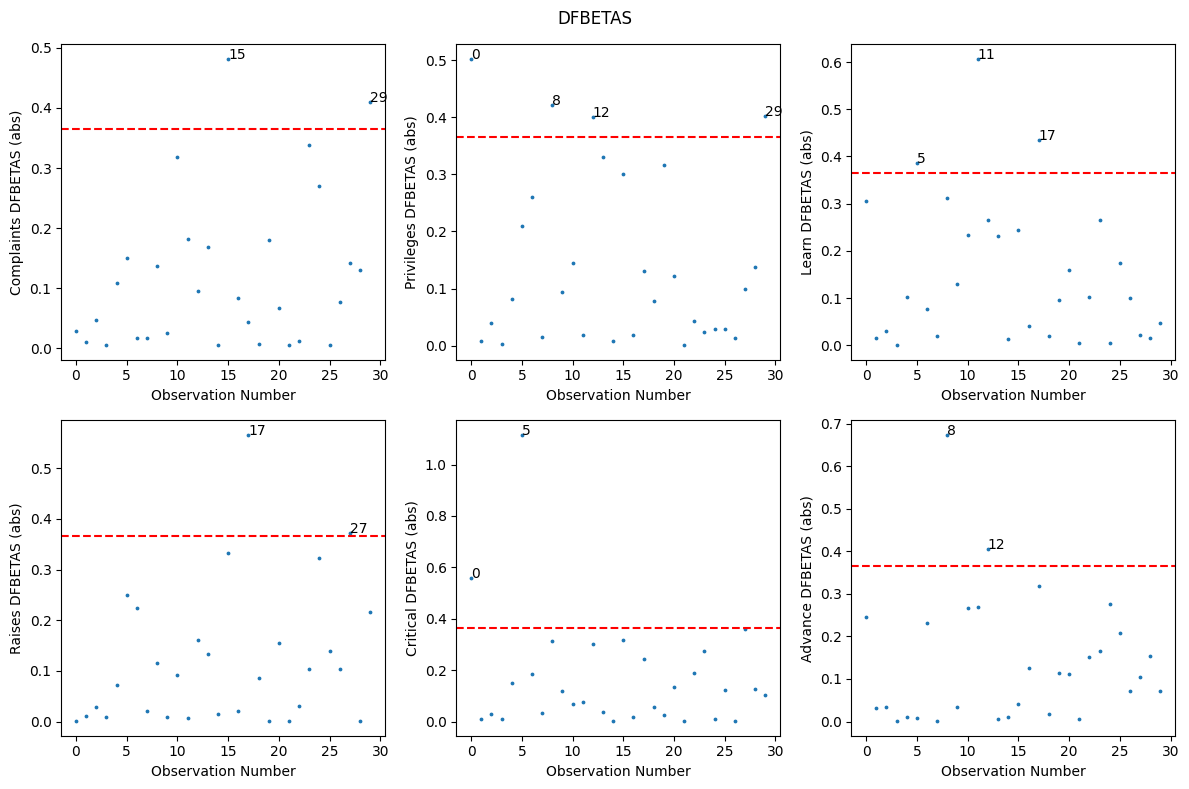

In [11]:
def plot_dfbetas(column, ax, label_level = 2 / np.sqrt(len(super))):
    idx = super.columns.get_loc(column)
    super['dfbetas_' + column] = res.get_influence().dfbetas[:, idx]

    ax.set_ylabel(column + " DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(super.index, np.abs(super['dfbetas_' + column]), s = 3)
    ax.axhline(y = label_level, color = 'r', linestyle = 'dashed')

    # optional: label outliers
    outliers = super[np.abs(super['dfbetas_' + column]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(super['dfbetas_' + column][i])))
    
fig, axes = plt.subplots(2, 3, figsize = (12, 8))
plt.suptitle("DFBETAS")
plot_dfbetas("Complaints", axes[0, 0])
plot_dfbetas("Privileges", axes[0, 1])
plot_dfbetas("Learn", axes[0, 2])
plot_dfbetas("Raises", axes[1, 0])
plot_dfbetas("Critical", axes[1, 1])
plot_dfbetas("Advance", axes[1, 2])
fig.tight_layout()
plt.show()

### 7. No Multicollinearity

**(a) Scatterplot Matrix**

**(b) Correlation Matrix**

**(c) Variance Inflation Factors (VIFs)**

In [12]:
# Variance Inflation Factors (VIF)
super_vifs = pd.DataFrame()
super_vifs['Feature'] = X.columns[1:]
super_vifs['VIF'] = [vif(X, i) for i in range(1, len(X.columns))]

print("Max = ", max(super_vifs['VIF']))
print("Mean = ", np.mean(super_vifs['VIF']))
super_vifs

Max =  3.0782262181910194
Mean =  2.1328201417058916


,Feature,VIF
0,Complaints,2.667060
1,Privileges,1.600891
2,Learn,2.271043
3,Raises,3.078226
4,Critical,1.228109
5,Advance,1.951591


In [13]:
# X.columns